# Import packages

In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Read Dataset

In [25]:
df = pd.read_csv('GUIDE_Train.csv', nrows=100000)

In [26]:
df.columns = df.columns.str.lower()
df.columns

Index(['id', 'orgid', 'incidentid', 'alertid', 'timestamp', 'detectorid',
       'alerttitle', 'category', 'mitretechniques', 'incidentgrade',
       'actiongrouped', 'actiongranular', 'entitytype', 'evidencerole',
       'deviceid', 'sha256', 'ipaddress', 'url', 'accountsid', 'accountupn',
       'accountobjectid', 'accountname', 'devicename', 'networkmessageid',
       'emailclusterid', 'registrykey', 'registryvaluename',
       'registryvaluedata', 'applicationid', 'applicationname',
       'oauthapplicationid', 'threatfamily', 'filename', 'folderpath',
       'resourceidname', 'resourcetype', 'roles', 'osfamily', 'osversion',
       'antispamdirection', 'suspicionlevel', 'lastverdict', 'countrycode',
       'state', 'city'],
      dtype='object')

In [27]:
df['incidentgrade'].value_counts()

incidentgrade
BenignPositive    43024
TruePositive      34887
FalsePositive     21564
Name: count, dtype: int64

# Removing null columns & rows

In [28]:
missing_percentage = (df.isna().sum() / len(df)) * 100

missing_percentage = missing_percentage.sort_values(ascending=False)

missing_percentage

resourcetype          99.909
actiongrouped         99.412
actiongranular        99.412
threatfamily          99.200
emailclusterid        98.984
antispamdirection     98.220
roles                 97.728
suspicionlevel        84.876
lastverdict           76.567
mitretechniques       57.496
incidentgrade          0.525
applicationid          0.000
filename               0.000
registryvaluedata      0.000
applicationname        0.000
registryvaluename      0.000
oauthapplicationid     0.000
id                     0.000
folderpath             0.000
resourceidname         0.000
registrykey            0.000
osversion              0.000
countrycode            0.000
state                  0.000
osfamily               0.000
devicename             0.000
networkmessageid       0.000
evidencerole           0.000
incidentid             0.000
alertid                0.000
timestamp              0.000
detectorid             0.000
alerttitle             0.000
category               0.000
entitytype    

In [29]:
df = df.drop(columns=['resourcetype',
 'actiongrouped',
 'actiongranular',
 'threatfamily',
 'emailclusterid',
 'antispamdirection',
 'roles',
 'suspicionlevel',
 'lastverdict',
 'mitretechniques'])

In [30]:
df = df.dropna()

In [31]:
df.head(5)

,id,orgid,incidentid,alertid,timestamp,detectorid,alerttitle,category,incidentgrade,entitytype,evidencerole,deviceid,sha256,ipaddress,url,accountsid,accountupn,accountobjectid,accountname,devicename,networkmessageid,registrykey,registryvaluename,registryvaluedata,applicationid,applicationname,oauthapplicationid,filename,folderpath,resourceidname,osfamily,osversion,countrycode,state,city
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,TruePositive,Ip,Related,98799,138268,27,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,FalsePositive,User,Impacted,98799,138268,360606,160396,22406,23032,22795,24887,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,FalsePositive,Url,Related,98799,138268,360606,68652,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,BenignPositive,Url,Related,98799,138268,360606,13,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,TruePositive,User,Impacted,98799,138268,360606,160396,449,592,440,479,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630


# Handling Date/Time Feature

In [32]:
df.columns


Index(['id', 'orgid', 'incidentid', 'alertid', 'timestamp', 'detectorid',
       'alerttitle', 'category', 'incidentgrade', 'entitytype', 'evidencerole',
       'deviceid', 'sha256', 'ipaddress', 'url', 'accountsid', 'accountupn',
       'accountobjectid', 'accountname', 'devicename', 'networkmessageid',
       'registrykey', 'registryvaluename', 'registryvaluedata',
       'applicationid', 'applicationname', 'oauthapplicationid', 'filename',
       'folderpath', 'resourceidname', 'osfamily', 'osversion', 'countrycode',
       'state', 'city'],
      dtype='object')

In [33]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [34]:
le = LabelEncoder()
df['incidentgrade'] = le.fit_transform(df['incidentgrade'])

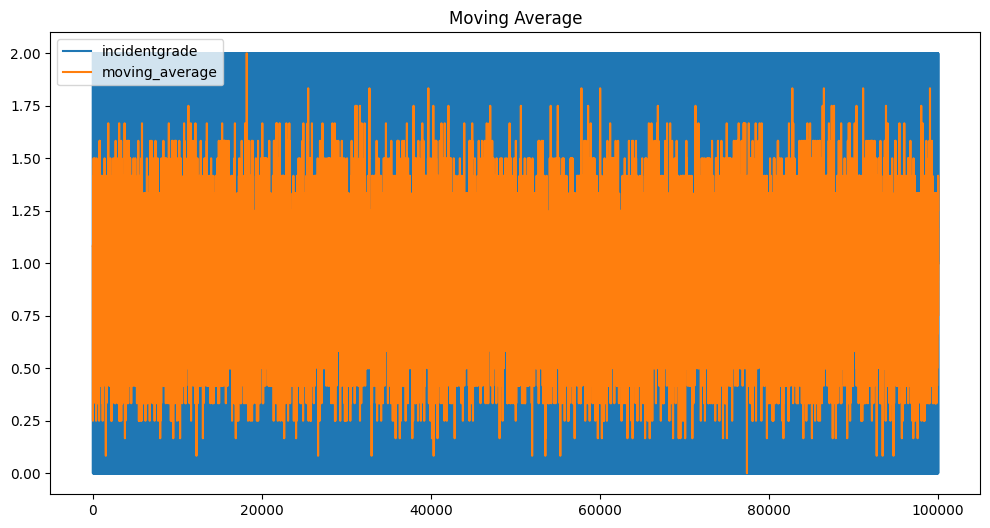

In [35]:
df['moving_average'] = df['incidentgrade'].rolling(window=12).mean()  
df[['incidentgrade', 'moving_average']].plot(figsize=(12, 6))
plt.title('Moving Average')
plt.show()


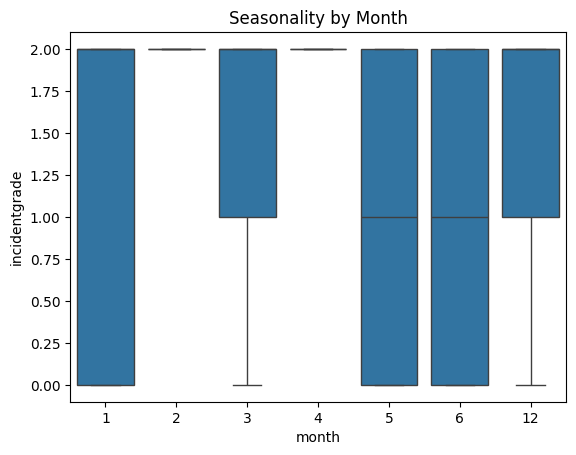

In [36]:
import seaborn as sns

df['month'] = df['timestamp'].dt.month  # Extract month from the timestamp
sns.boxplot(x='month', y='incidentgrade', data=df)  
plt.title('Seasonality by Month')
plt.show()


In [37]:

# df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute

# Drop the original timestamp column
df.drop('timestamp', axis=1, inplace=True)

In [38]:
# 2. Descriptive Statistics
print("\nSummary Statistics:")
df.describe()



Summary Statistics:


,id,orgid,incidentid,alertid,detectorid,alerttitle,incidentgrade,deviceid,sha256,ipaddress,url,accountsid,accountupn,accountobjectid,accountname,devicename,networkmessageid,registrykey,registryvaluename,registryvaluedata,applicationid,applicationname,oauthapplicationid,filename,folderpath,resourceidname,osfamily,osversion,countrycode,state,city,moving_average,month,year,day,hour,minute
count,9.947500e+04,99475.000000,99475.000000,9.947500e+04,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000,99475.00000,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000,99464.000000,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000
mean,8.450411e+11,178.131782,69867.712189,4.018560e+05,102.503895,2783.754883,0.918201,95718.679548,128770.008344,285583.513385,150099.740347,353152.952450,465426.602171,341639.348218,357652.413632,143352.129972,479856.710912,1628.031174,634.729832,859.555738,2200.418025,3342.10861,880.812355,262522.739140,107749.932465,3582.801156,4.900880,64.688123,223.487168,1350.035476,9927.235366,0.918188,5.908962,2023.999970,9.812465,12.201789,29.484685
std,4.972232e+11,378.925985,119515.658322,4.551305e+05,401.960808,10916.886841,0.881214,16185.796887,33885.369545,141376.254779,37916.160730,166030.441598,289906.317163,159527.978409,174033.787617,35849.630764,142058.704650,68.254084,12.690054,18.712934,332.969398,512.22595,12.303043,81190.702731,32025.701846,102.784147,0.695811,9.204559,63.107316,353.647832,2622.108834,0.252974,0.292757,0.005492,6.182930,6.773627,17.342603
min,5.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2023.000000,1.000000,0.000000,0.000000
25%,4.209068e+11,10.000000,492.000000,2.321600e+04,2.000000,2.000000,0.000000,98799.000000,138268.000000,360606.000000,160396.000000,441377.000000,94897.000000,425863.000000,453297.000000,153085.000000,529644.000000,1631.000000,635.000000,860.000000,2251.000000,3421.00000,881.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000,0.750000,6.000000,2024.000000,5.000000,7.000000,14.000000
50%,8.418136e+11,44.000000,10018.000000,2.142200e+05,8.000000,11.000000,1.000000,98799.000000,138268.000000,360606.000000,160396.000000,441377.000000,673934.000000,425863.000000,453297.000000,153085.000000,529644.000000,1631.000000,635.000000,860.000000,2251.000000,3421.00000,881.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000,0.916667,6.000000,2024.000000,9.000000,13.000000,29.000000
75%,1.279900e+12,169.000000,83244.000000,6.630775e+05,44.000000,173.000000,2.000000,98799.000000,138268.000000,360606.000000,160396.000000,441377.000000,673934.000000,425863.000000,453297.000000,153085.000000,529644.000000,1631.000000,635.000000,860.000000,2251.000000,3421.00000,881.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000,1.083333,6.000000,2024.000000,12.000000,18.000000,45.000000
max,1.709397e+12,6077.000000,599699.000000,1.721368e+06,9329.000000,113167.000000,2.000000,98799.000000,138268.000000,360606.000000,160396.000000,441377.000000,673934.000000,425863.000000,453297.000000,153085.000000,529644.000000,1631.000000,635.000000,860.000000,2251.000000,3421.00000,881.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000,2.000000,12.000000,2024.000000,31.000000,23.000000,59.000000


In [39]:

# Unique values for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nUnique Values in Categorical Columns:")

for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique Values in Categorical Columns:
category: 18 unique values
entitytype: 25 unique values
evidencerole: 2 unique values


In [40]:
# 3. Target Variable Analysis (`incidentgrade`)
print("\nIncident Grade Distribution:")
df['incidentgrade'].value_counts()


Incident Grade Distribution:


incidentgrade
0    43024
2    34887
1    21564
Name: count, dtype: int64

# Feature Analysis

In [41]:
# 4. Feature Analysis
# Numerical Features Analysis
numerical_columns = df.select_dtypes(include=[np.number]).columns
print("\nNumerical Columns Summary:")
df[numerical_columns].describe()


Numerical Columns Summary:


,id,orgid,incidentid,alertid,detectorid,alerttitle,incidentgrade,deviceid,sha256,ipaddress,url,accountsid,accountupn,accountobjectid,accountname,devicename,networkmessageid,registrykey,registryvaluename,registryvaluedata,applicationid,applicationname,oauthapplicationid,filename,folderpath,resourceidname,osfamily,osversion,countrycode,state,city,moving_average,month,year,day,hour,minute
count,9.947500e+04,99475.000000,99475.000000,9.947500e+04,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000,99475.00000,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000,99464.000000,99475.000000,99475.000000,99475.000000,99475.000000,99475.000000
mean,8.450411e+11,178.131782,69867.712189,4.018560e+05,102.503895,2783.754883,0.918201,95718.679548,128770.008344,285583.513385,150099.740347,353152.952450,465426.602171,341639.348218,357652.413632,143352.129972,479856.710912,1628.031174,634.729832,859.555738,2200.418025,3342.10861,880.812355,262522.739140,107749.932465,3582.801156,4.900880,64.688123,223.487168,1350.035476,9927.235366,0.918188,5.908962,2023.999970,9.812465,12.201789,29.484685
std,4.972232e+11,378.925985,119515.658322,4.551305e+05,401.960808,10916.886841,0.881214,16185.796887,33885.369545,141376.254779,37916.160730,166030.441598,289906.317163,159527.978409,174033.787617,35849.630764,142058.704650,68.254084,12.690054,18.712934,332.969398,512.22595,12.303043,81190.702731,32025.701846,102.784147,0.695811,9.204559,63.107316,353.647832,2622.108834,0.252974,0.292757,0.005492,6.182930,6.773627,17.342603
min,5.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2023.000000,1.000000,0.000000,0.000000
25%,4.209068e+11,10.000000,492.000000,2.321600e+04,2.000000,2.000000,0.000000,98799.000000,138268.000000,360606.000000,160396.000000,441377.000000,94897.000000,425863.000000,453297.000000,153085.000000,529644.000000,1631.000000,635.000000,860.000000,2251.000000,3421.00000,881.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000,0.750000,6.000000,2024.000000,5.000000,7.000000,14.000000
50%,8.418136e+11,44.000000,10018.000000,2.142200e+05,8.000000,11.000000,1.000000,98799.000000,138268.000000,360606.000000,160396.000000,441377.000000,673934.000000,425863.000000,453297.000000,153085.000000,529644.000000,1631.000000,635.000000,860.000000,2251.000000,3421.00000,881.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000,0.916667,6.000000,2024.000000,9.000000,13.000000,29.000000
75%,1.279900e+12,169.000000,83244.000000,6.630775e+05,44.000000,173.000000,2.000000,98799.000000,138268.000000,360606.000000,160396.000000,441377.000000,673934.000000,425863.000000,453297.000000,153085.000000,529644.000000,1631.000000,635.000000,860.000000,2251.000000,3421.00000,881.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000,1.083333,6.000000,2024.000000,12.000000,18.000000,45.000000
max,1.709397e+12,6077.000000,599699.000000,1.721368e+06,9329.000000,113167.000000,2.000000,98799.000000,138268.000000,360606.000000,160396.000000,441377.000000,673934.000000,425863.000000,453297.000000,153085.000000,529644.000000,1631.000000,635.000000,860.000000,2251.000000,3421.00000,881.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000,2.000000,12.000000,2024.000000,31.000000,23.000000,59.000000


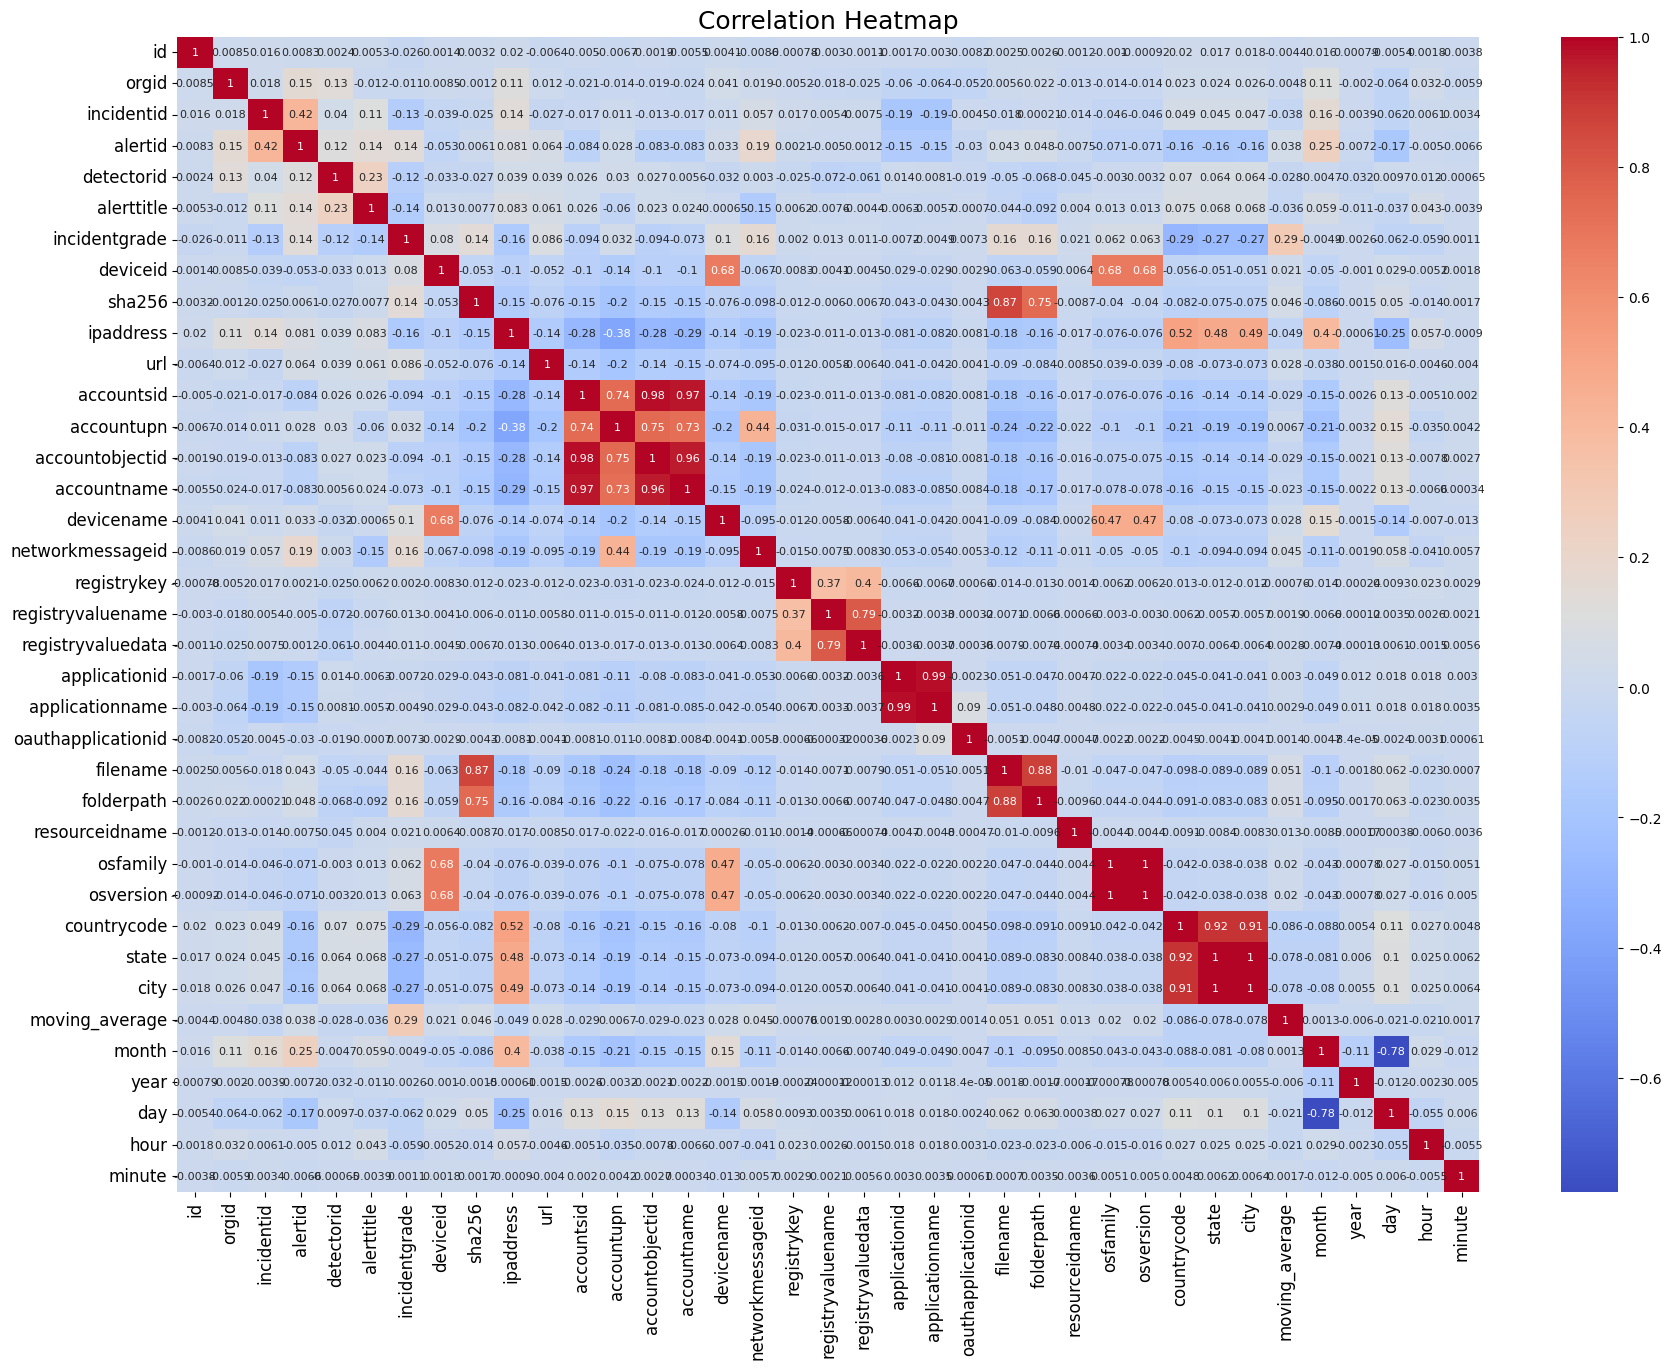

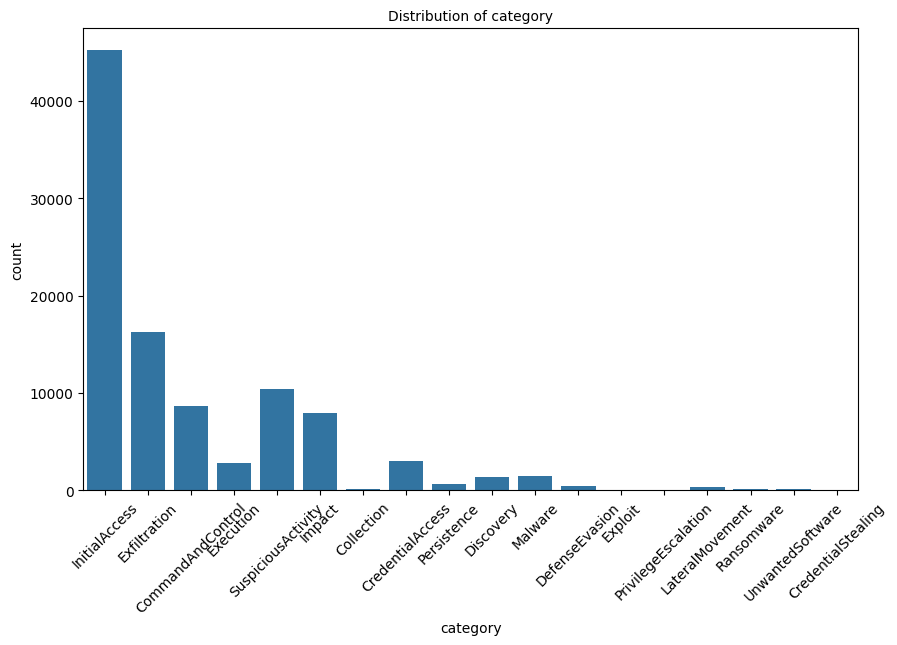

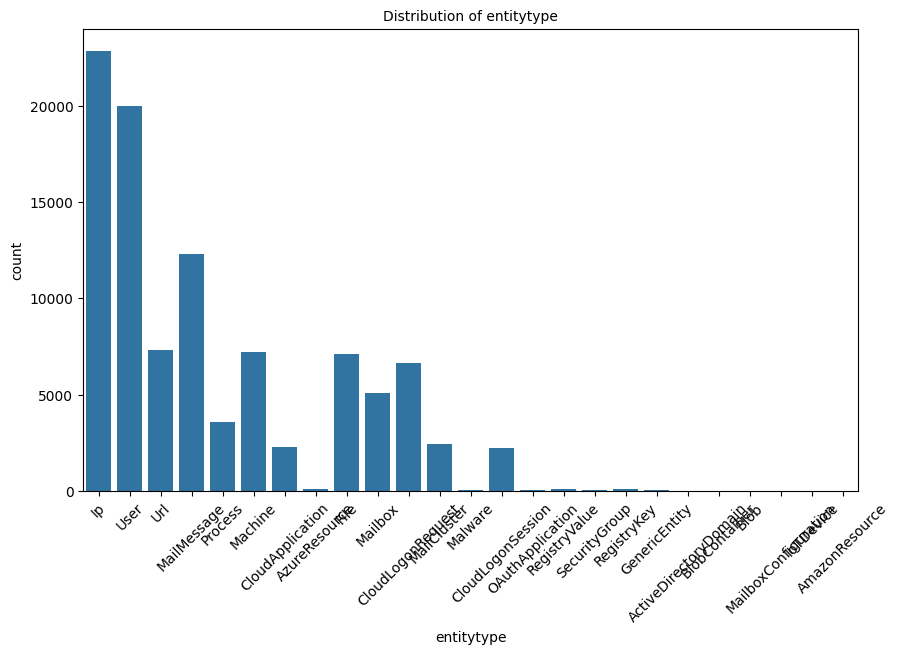

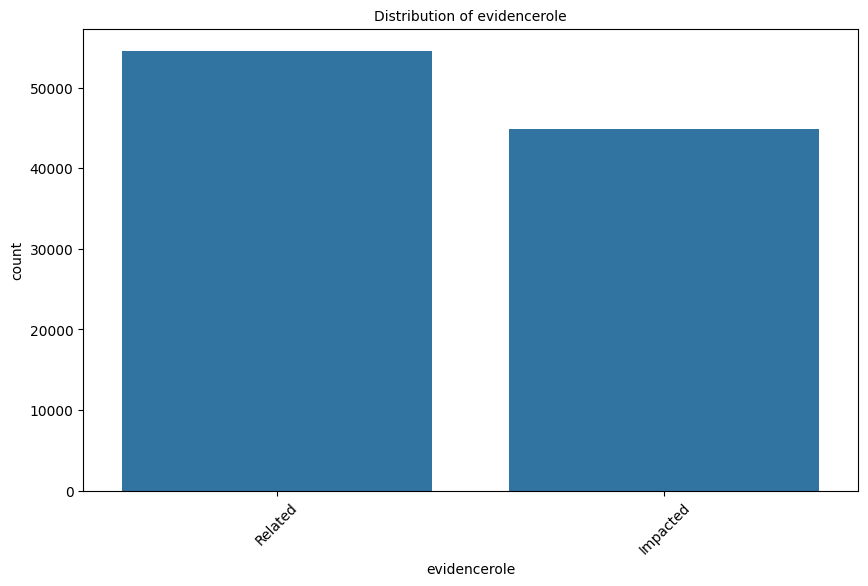

In [42]:
plt.figure(figsize=(21, 15))  # Increase figure size
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', annot_kws={"size": 8})
plt.title('Correlation Heatmap', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Categorical Features Analysis
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}', fontsize=10)  # Set title font size
    plt.xticks(rotation=45, fontsize=10)  # Decrease x-tick font size
    plt.yticks(fontsize=10)  # Decrease y-tick font size
    plt.show()


In [43]:
import numpy as np

# Compute the correlation matrix
correlation_matrix = df[numerical_columns].corr().abs()

# Set a threshold for what you consider "high" correlation
threshold = 0.8

# Find pairs of features that are above the threshold
high_corr_pairs = np.where((correlation_matrix > threshold) & (correlation_matrix < 1))

# List the pairs and their correlation coefficients
high_corr_list = [(correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iloc[x, y]) 
                  for x, y in zip(*high_corr_pairs)]

# Display the list of highly correlated pairs
for pair in high_corr_list:
    print(f"Features: {pair[0]} and {pair[1]} - Correlation: {pair[2]:.2f}")


Features: sha256 and filename - Correlation: 0.87
Features: accountsid and accountobjectid - Correlation: 0.98
Features: accountsid and accountname - Correlation: 0.97
Features: accountobjectid and accountsid - Correlation: 0.98
Features: accountobjectid and accountname - Correlation: 0.96
Features: accountname and accountsid - Correlation: 0.97
Features: accountname and accountobjectid - Correlation: 0.96
Features: applicationid and applicationname - Correlation: 0.99
Features: applicationname and applicationid - Correlation: 0.99
Features: filename and sha256 - Correlation: 0.87
Features: filename and folderpath - Correlation: 0.88
Features: folderpath and filename - Correlation: 0.88
Features: osfamily and osversion - Correlation: 1.00
Features: osversion and osfamily - Correlation: 1.00
Features: countrycode and state - Correlation: 0.92
Features: countrycode and city - Correlation: 0.91
Features: state and countrycode - Correlation: 0.92
Features: state and city - Correlation: 1.0

 Group Features by Correlation and Logical Relationships

Group 1: Account Information

Primary Feature: accountsid
Correlated Features: accountobjectid (0.98), accountname (0.97)

Group 2: Application Information

Primary Feature: applicationid
Correlated Feature: applicationname (0.99)

Group 3: File Information

Primary Feature: filename
Correlated Features: sha256 (0.87), folderpath (0.88)

Group 4: OS Information

Primary Feature: osfamily
Correlated Feature: osversion (1.00)

Group 5: Location Information

Primary Feature: state
Correlated Features: city (1.00), countrycode (0.92)

In [44]:
hi_corr_columns = ['accountobjectid','accountname','applicationname','sha256','folderpath','osversion','city','countrycode']

# hist plot

IndexError: index 5 is out of bounds for axis 0 with size 5

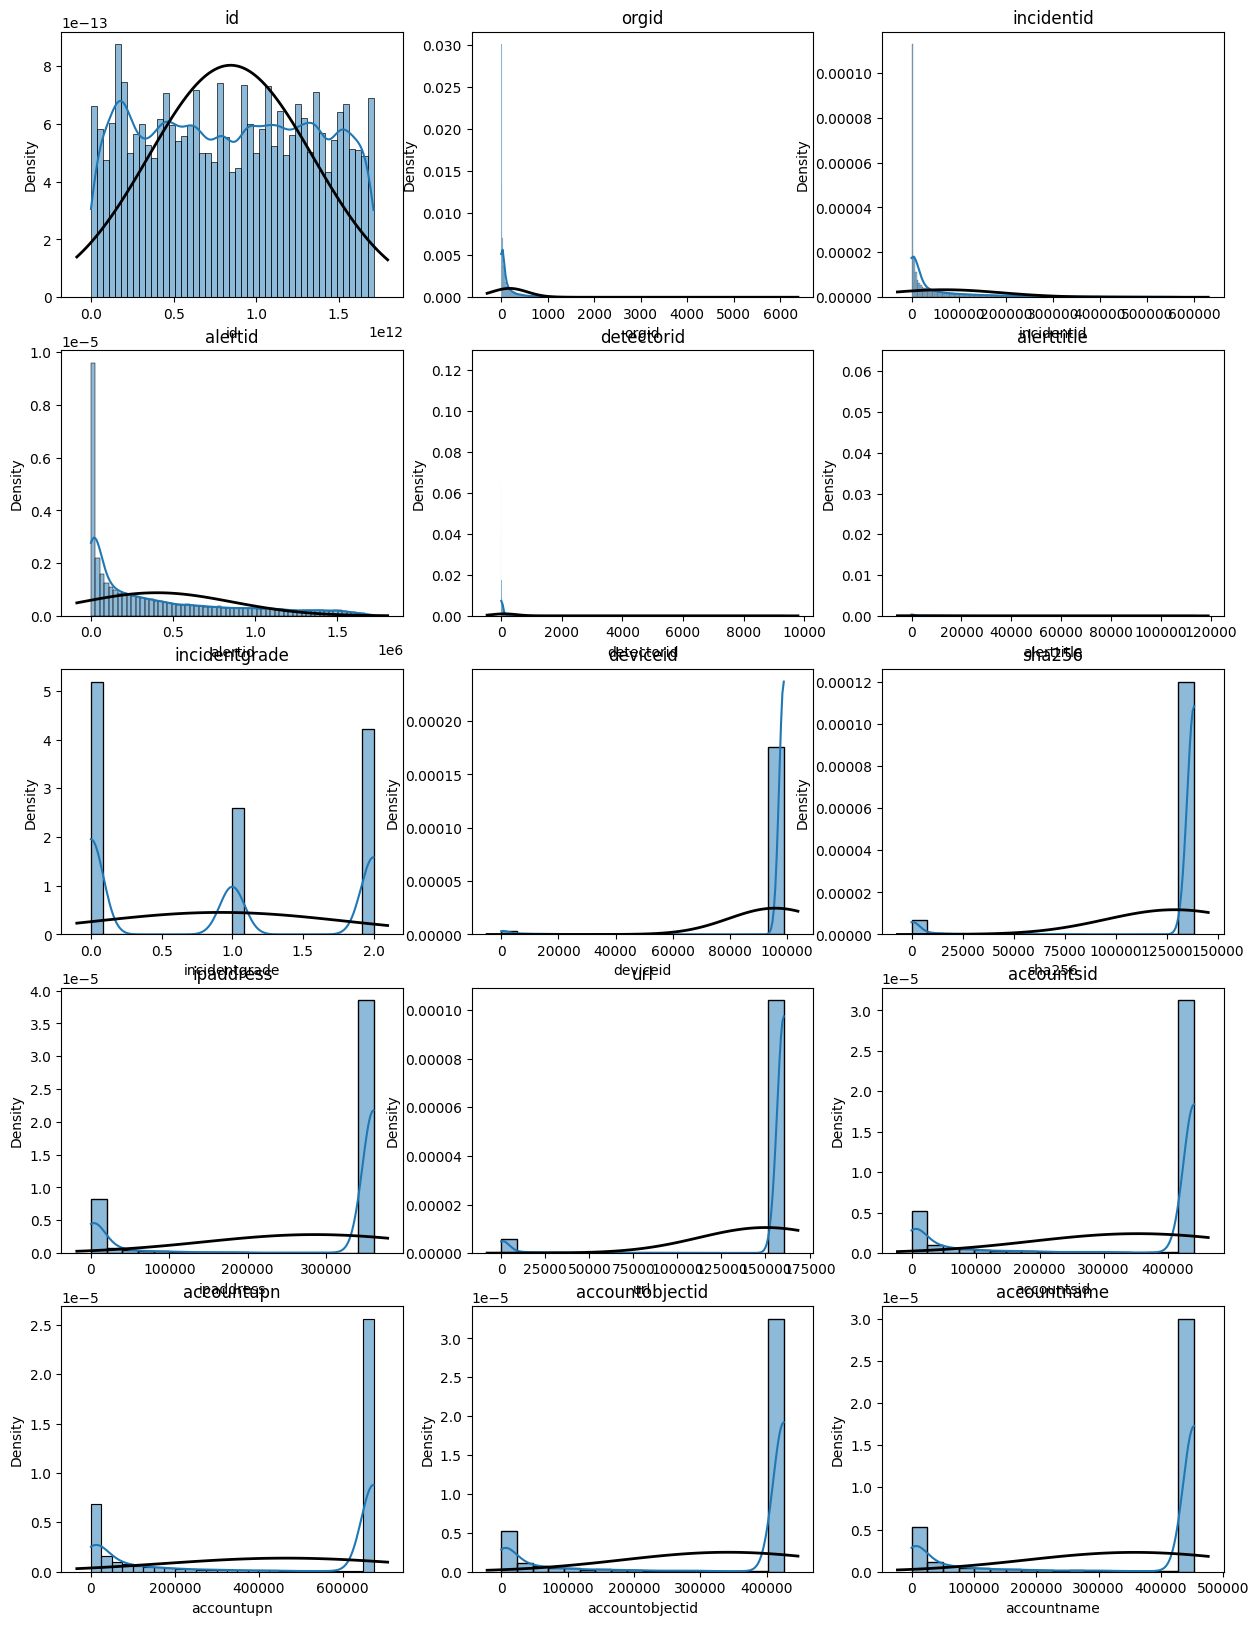

In [45]:
data = df
# Plot histograms with normal distribution fit
columns = numerical_columns
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))

for i, column in enumerate(columns):
    sns.histplot(data[column], kde=True, ax=axes[i//3, i%3], stat="density")
    mu, std = norm.fit(data[column])
    xmin, xmax = axes[i//3, i%3].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    axes[i//3, i%3].plot(x, p, 'k', linewidth=2)
    axes[i//3, i%3].set_title(f'{column}')
    axes[i//3, i%3].set_ylabel('Density')

plt.tight_layout()
plt.show()


In [ ]:
# # 5. Target Variable Relationship with Features
# for col in numerical_columns:
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x='incidentgrade', y=col, data=df)
#     plt.title(f'{col} vs Incident Grade')
#     plt.show()

# for col in categorical_columns:
#     plt.figure(figsize=(10, 6))
#     sns.countplot(data=df, x=col, hue='incidentgrade')
#     plt.title(f'{col} vs Incident Grade')
#     plt.xticks(rotation=45)
#     plt.show()


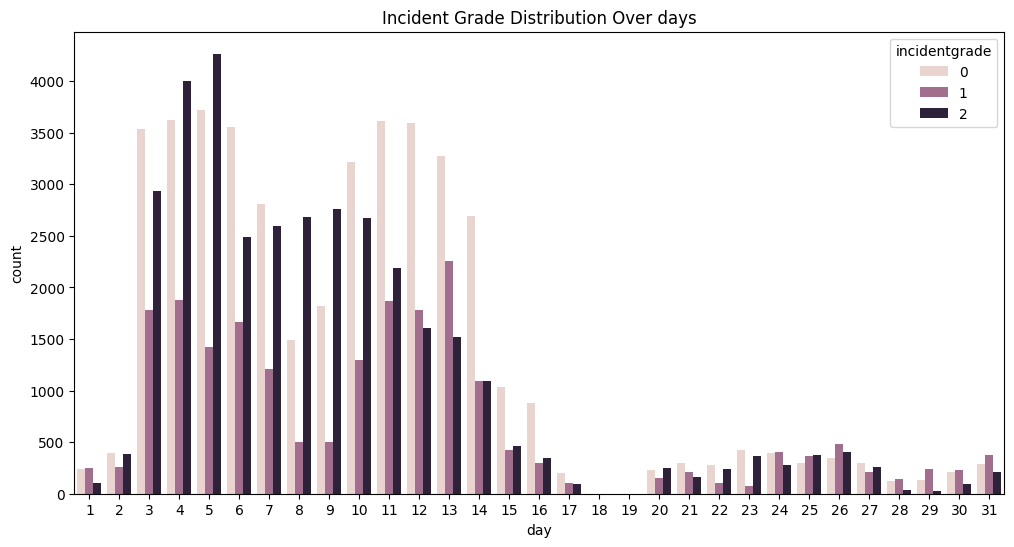

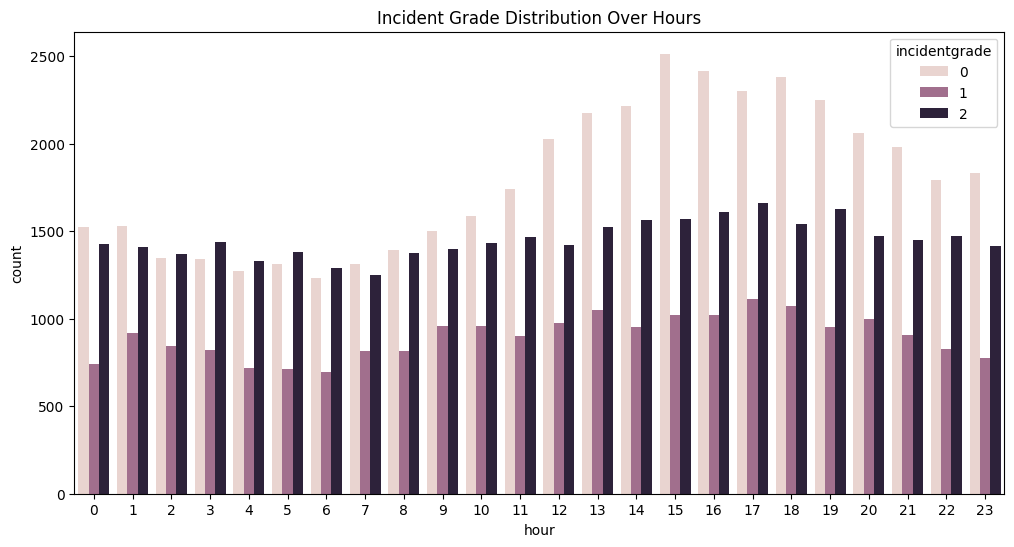

In [ ]:
# Analyze the trend of incidentgrade over time
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='day', hue='incidentgrade')
plt.title('Incident Grade Distribution Over days')
plt.show()

# Analyze the trend of incidentgrade over time
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='hour', hue='incidentgrade')
plt.title('Incident Grade Distribution Over Hours')
plt.show()


# hours
Conclusions:
1 Midday Dominance of Grade 0: The midday hours (12:00 to 15:00) are characterized by a higher prevalence of Grade 0 incidents, suggesting a period of relatively lower severity incidents.
2 Early Morning Spike in Grade 2: There is a clear trend of more severe incidents (Grade 2) occurring during the early morning hours (4:00 to 6:00), which could be crucial for SOCs to focus resources during these times.
3 Stable Presence of Grade 1: Grade 1 incidents are consistently present but do not dominate at any specific hour, making them a steady factor throughout the day.
These trends can help SOCs prioritize their monitoring and response efforts based on the time of day, ensuring that resources are allocated efficiently to handle the most severe incidents during peak hours.


# days:
Conclusions:
The data shows distinct trends in how incident grades are distributed across different days.
There are specific days where one grade dominates completely (like Day 18 and 19), while others see a more even distribution.
Days with sudden spikes or drops in certain grades (e.g., Day 8, 9, 28, 29) might warrant further investigation to understand the underlying causes.

In [ ]:
# Calculate the count of each incident grade per day
incident_grade_trend = df.groupby(['hour', 'incidentgrade']).size().unstack(fill_value=0)

# Calculate the percentage of each incident grade per day
incident_grade_percentage = incident_grade_trend.div(incident_grade_trend.sum(axis=1), axis=0) * 100

pd.DataFrame(incident_grade_percentage)


incidentgrade,0,1,2
hour,,,
0,41.300813,20.108401,38.590786
1,39.626556,23.832988,36.540456
2,37.763417,23.742624,38.493959
3,37.263626,22.747497,39.988877
4,38.241494,21.650105,40.108401
5,38.556338,20.980047,40.463615
6,38.210624,21.652687,40.136688
7,38.855957,24.096028,37.048014
8,38.878035,22.774212,38.347753


# class balancing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.utils import resample

# Assuming your dataframe is called 'df' and the column is 'incidentgrade'

# Get the value counts
value_counts = df_train['incidentgrade'].value_counts()

# Find the minimum count
min_count = value_counts.min()

# Create a list to store the balanced dataframes
balanced_dfs = []

# Undersample each class
for class_value in value_counts.index:
    class_df = df_train[df_train['incidentgrade'] == class_value]

    if len(class_df) > min_count:
        # Undersample
        undersampled_df = resample(class_df,
                                   replace=False,    # sample without replacement
                                   n_samples=min_count,
                                   random_state=42)  # reproducible results
        balanced_dfs.append(undersampled_df)
    else:
        # If this class is already at or below the minimum, keep all samples
        balanced_dfs.append(class_df)

# Combine the balanced dataframes
df_balanced = pd.concat(balanced_dfs)
